# Starting Point

In [ ]:
# Upload Dataset
from google.colab import files
upl = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# read and display data
df = pd.read_csv('kc_house_data.csv')
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [ ]:
# all columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# shape of data
df.shape

(21613, 21)

In [ ]:
# data description
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.iloc[500].tolist

<bound method IndexOpsMixin.tolist of id                    7852170140
date             20150510T000000
price                   650000.0
bedrooms                       4
bathrooms                    2.5
sqft_living                 3180
sqft_lot                    5438
floors                       2.0
waterfront                     0
view                           0
condition                      3
grade                          9
sqft_above                  3180
sqft_basement                  0
yr_built                    2003
yr_renovated                   0
zipcode                    98065
lat                      47.5416
long                    -121.864
sqft_living15               3030
sqft_lot15                  5335
Name: 500, dtype: object>

In [ ]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# check for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Test locs
df.iloc[2]

id                    5631500400
date             20150225T000000
price                   180000.0
bedrooms                       2
bathrooms                    1.0
sqft_living                  770
sqft_lot                   10000
floors                       1.0
waterfront                     0
view                           0
condition                      3
grade                          6
sqft_above                   770
sqft_basement                  0
yr_built                    1933
yr_renovated                   0
zipcode                    98028
lat                      47.7379
long                    -122.233
sqft_living15               2720
sqft_lot15                  8062
Name: 2, dtype: object

In [ ]:
df.iloc[-84]

id                    2487200490
date             20140623T000000
price                   670000.0
bedrooms                       3
bathrooms                    2.5
sqft_living                 3310
sqft_lot                    5300
floors                       2.0
waterfront                     0
view                           2
condition                      3
grade                          8
sqft_above                  2440
sqft_basement                870
yr_built                    2008
yr_renovated                   0
zipcode                    98136
lat                      47.5178
long                    -122.389
sqft_living15               2140
sqft_lot15                  7500
Name: 21529, dtype: object

# Visualizations

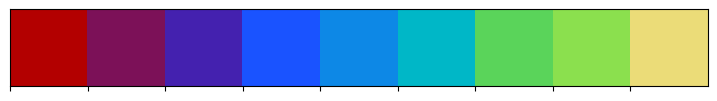

In [ ]:
# color scheme
river_nights = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e", "#ebdc78"]
# color palates
sns.palplot(river_nights)

<Axes: xlabel='price', ylabel='Density'>

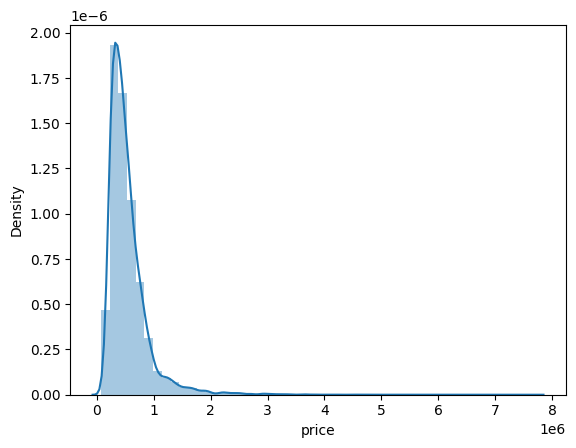

In [ ]:
# price distribution
sns.distplot(df['price'])

In [ ]:
# skewness and kurtosis
print('Skewness of price column is:',df['price'].skew())
print('Kurtosis of price column is:',df['price'].kurt())

Skewness of price column is: 4.024069144684712
Kurtosis of price column is: 34.58554043194243


In [ ]:
# # Log transform right skewed data
# lr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), ['price'])])
# df['price'] = lr.fit_transform(df)
# df['price']
df['price'] = np.log(df['price'])

<Axes: xlabel='price', ylabel='Density'>

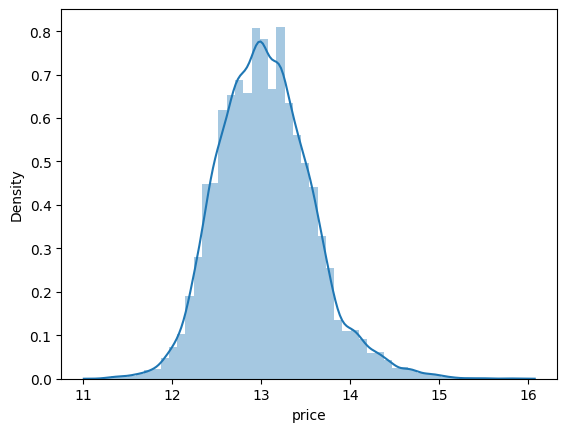

In [ ]:
# new price distribution
sns.distplot(df['price'])

**NB:** Never Log transform **LEFT** skewed data! Itll mess up your data.

In [ ]:
# sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
#        'lat', 'long', 'sqft_living15', 'sqft_lot15
transform_features = ['sqft_lot','sqft_above','sqft_living15', 'sqft_lot15','sqft_living']
for i in transform_features:
  df[i] = np.log(df[i])

<Axes: xlabel='sqft_living', ylabel='Density'>

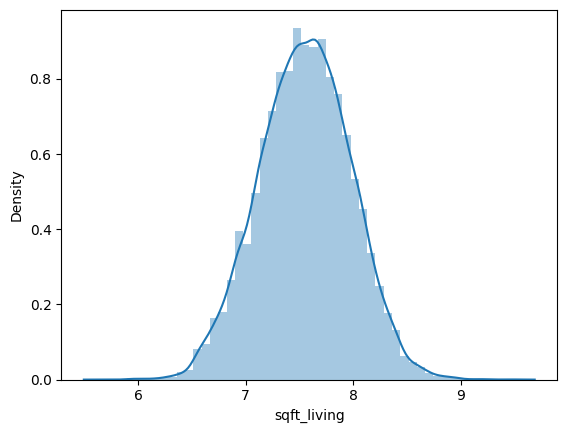

In [ ]:
sns.distplot(df['sqft_living'])

<Axes: xlabel='long', ylabel='Density'>

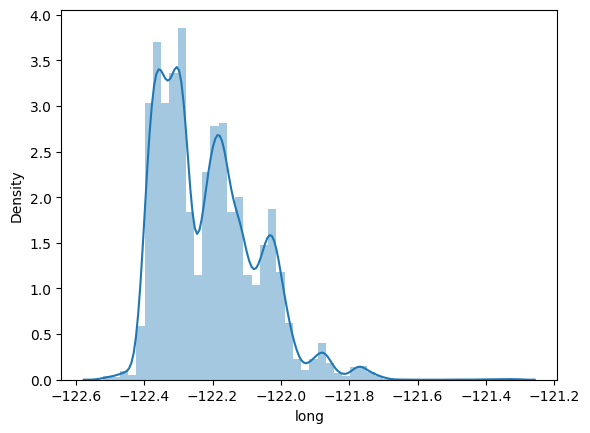

In [ ]:
sns.distplot(df['long'])

<Axes: xlabel='sqft_above', ylabel='Density'>

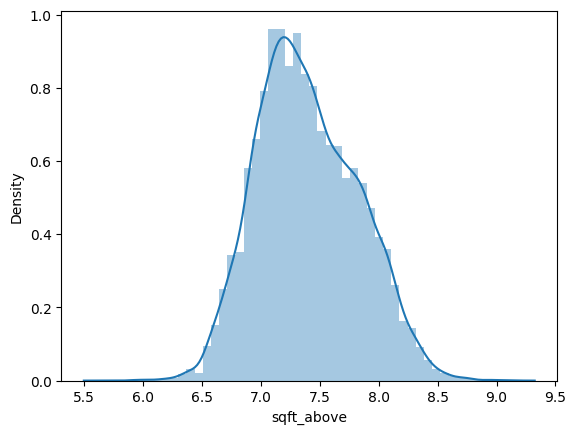

In [ ]:
sns.distplot(df['sqft_above'])

<Axes: xlabel='sqft_basement', ylabel='Density'>

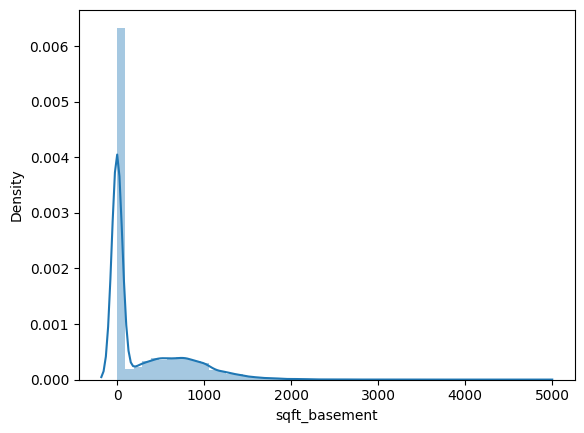

In [ ]:
sns.distplot(df['sqft_basement'])

<Axes: xlabel='sqft_above', ylabel='Density'>

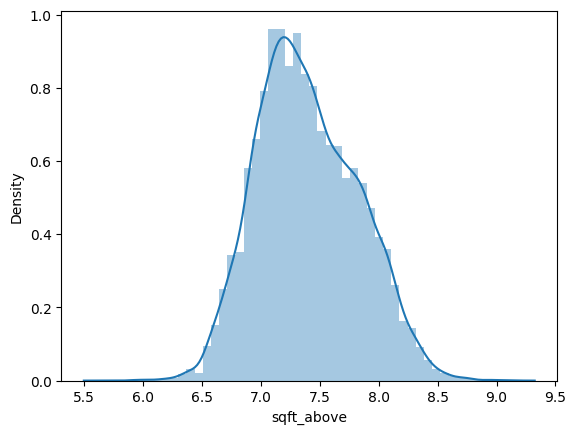

In [ ]:
sns.distplot(df['sqft_above'])

<Axes: xlabel='sqft_lot', ylabel='Density'>

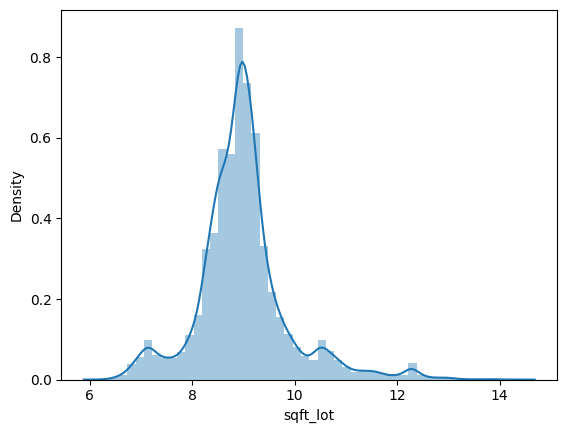

In [ ]:
# sqft_lot distribution
sns.distplot(df['sqft_lot'])

<Axes: xlabel='sqft_lot15', ylabel='Density'>

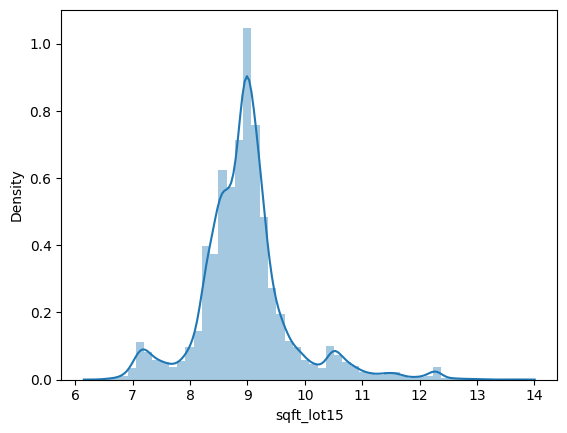

In [ ]:
sns.distplot(df['sqft_lot15'])

<Axes: xlabel='bedrooms', ylabel='count'>

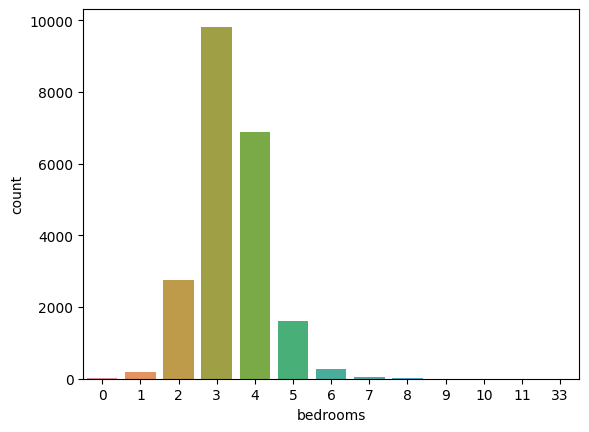

In [ ]:
# number of bedrooms in the house
sns.countplot(x='bedrooms', data=df)

<Axes: xlabel='floors', ylabel='count'>

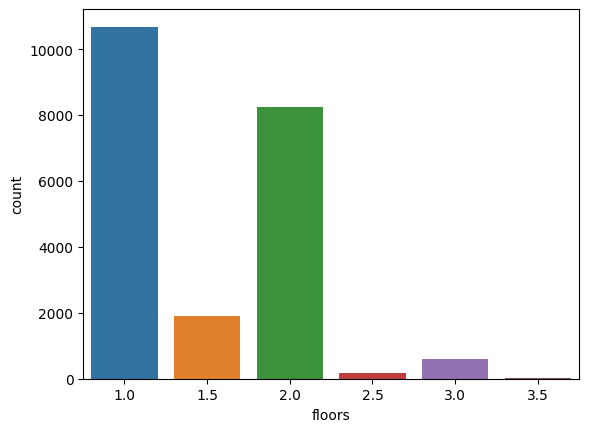

In [ ]:
# number of floors
sns.countplot(x='floors',data=df)

<Axes: xlabel='waterfront', ylabel='count'>

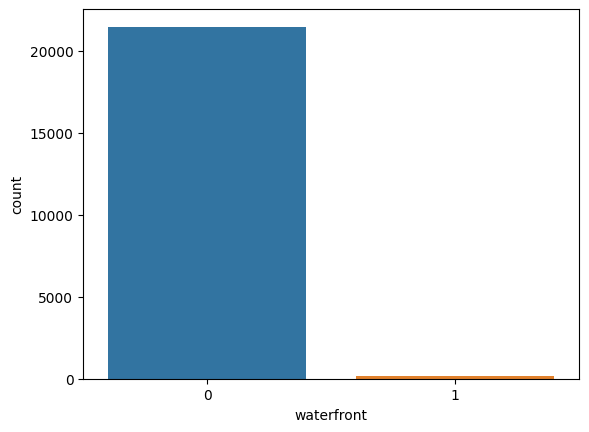

In [ ]:
# waterfront
sns.countplot(x='waterfront',data=df)

<Axes: xlabel='view', ylabel='count'>

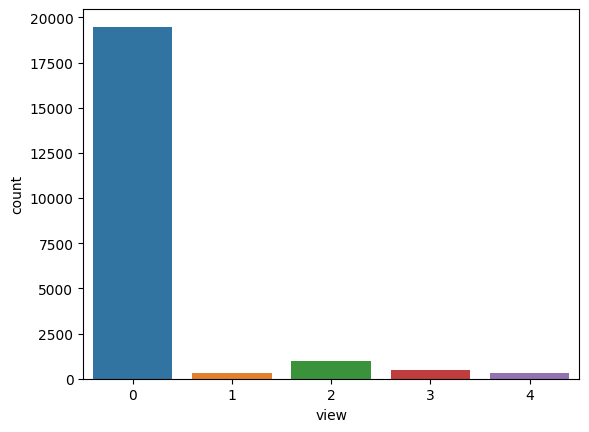

In [ ]:
# view?
sns.countplot(x='view', data=df)

<Axes: xlabel='condition', ylabel='count'>

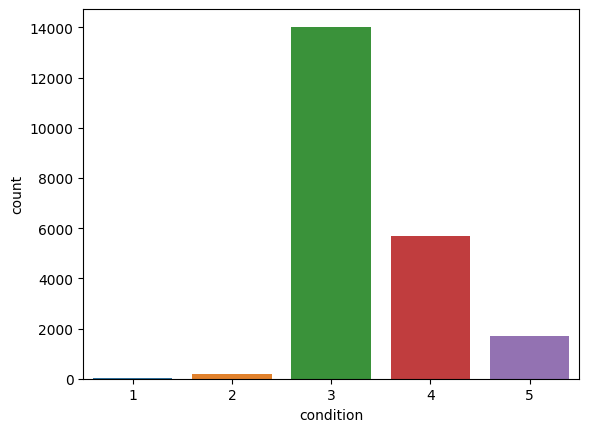

In [ ]:
# Condition
sns.countplot(x='condition',data=df)

<Axes: xlabel='grade', ylabel='count'>

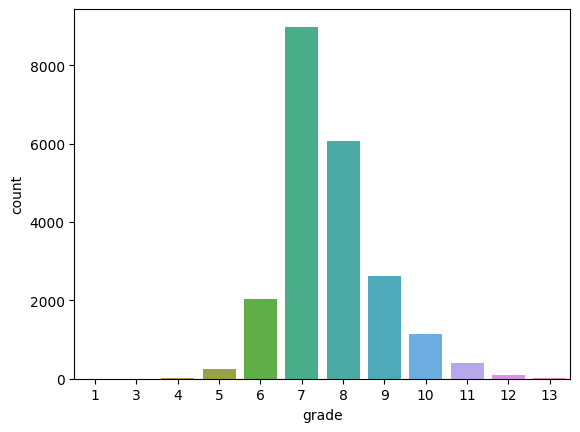

In [ ]:
# Grade
sns.countplot(x='grade',data=df)

<Axes: xlabel='yr_built', ylabel='count'>

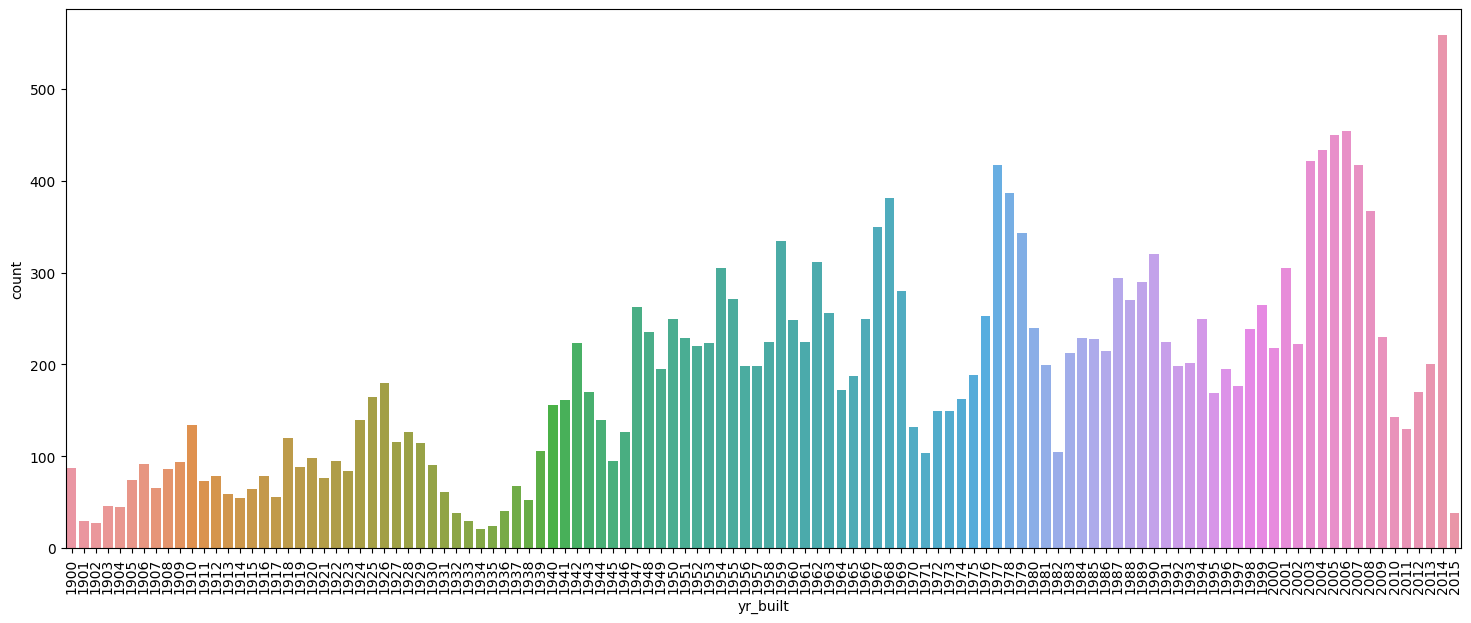

In [ ]:
# Year Built
plt.figure(figsize=(18,7))
plt.xticks(rotation=90)
sns.countplot(x='yr_built',data=df)

In [ ]:
# convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,12.309982,3,1.00,7.073270,8.639411,1.0,0,0,...,7,7.073270,0,1955,0,98178,47.5112,-122.257,7.200425,8.639411
1,6414100192,2014-12-09,13.195614,3,2.25,7.851661,8.887653,2.0,0,0,...,7,7.682482,400,1951,1991,98125,47.7210,-122.319,7.432484,8.941022
2,5631500400,2015-02-25,12.100712,2,1.00,6.646391,9.210340,1.0,0,0,...,6,6.646391,0,1933,0,98028,47.7379,-122.233,7.908387,8.994917


Text(0, 0.5, 'Price')

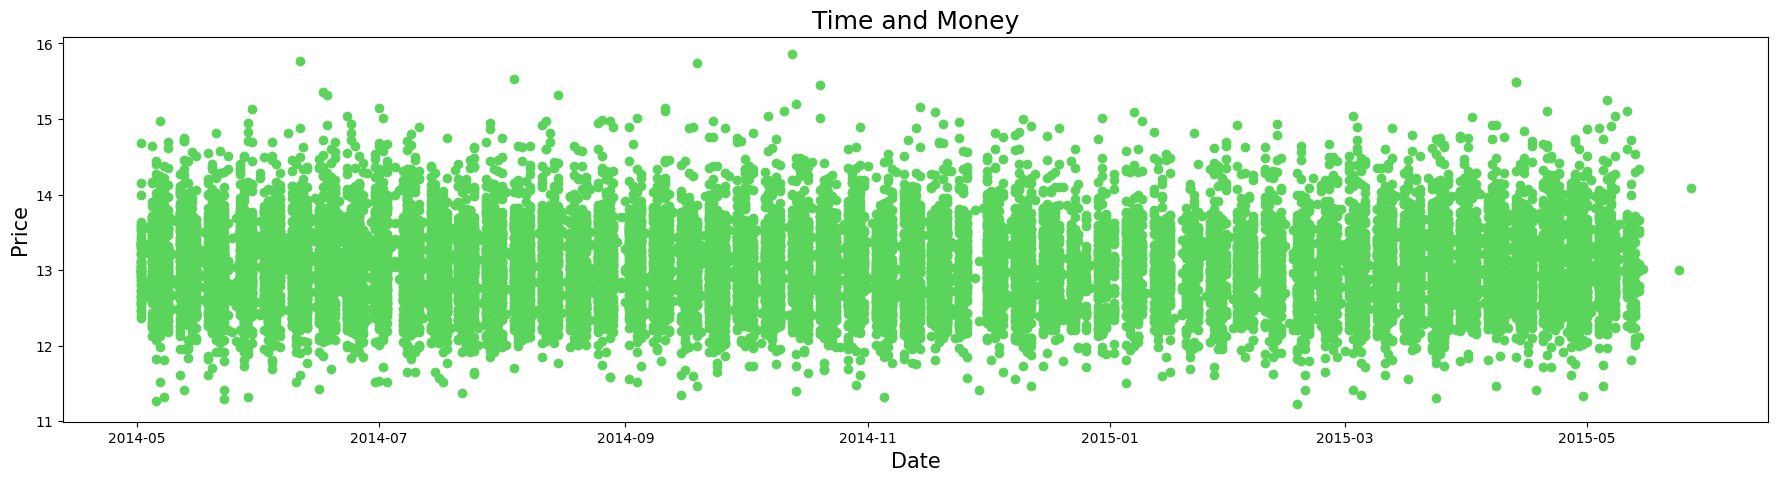

In [ ]:
# Date and Price
plt.figure(figsize=(22,5))
plt.scatter(x='date',y='price',data=df,color=river_nights[6])
plt.title('Time and Money',size=18)
plt.xlabel('Date',size=15)
plt.ylabel('Price',size=15)

Text(0, 0.5, 'Price')

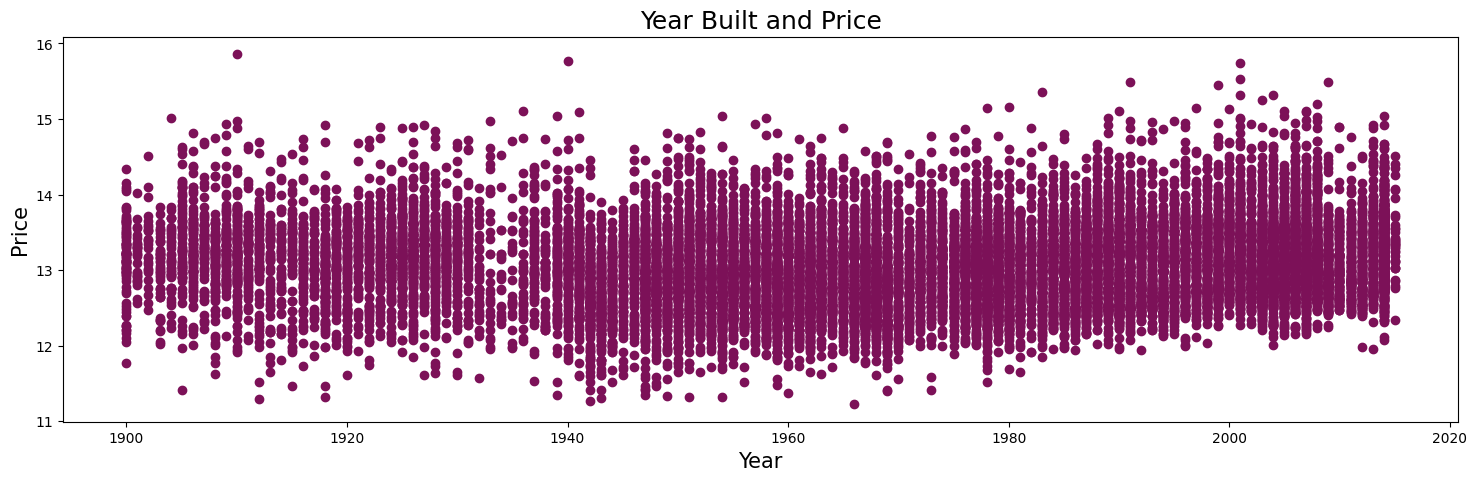

In [ ]:
# Year built and Price
plt.figure(figsize=(18,5))
plt.scatter(x='yr_built',y='price',data=df,color=river_nights[1])
plt.title('Year Built and Price',size=18)
plt.xlabel('Year',size=15)
plt.ylabel('Price',size=15)

<Axes: >

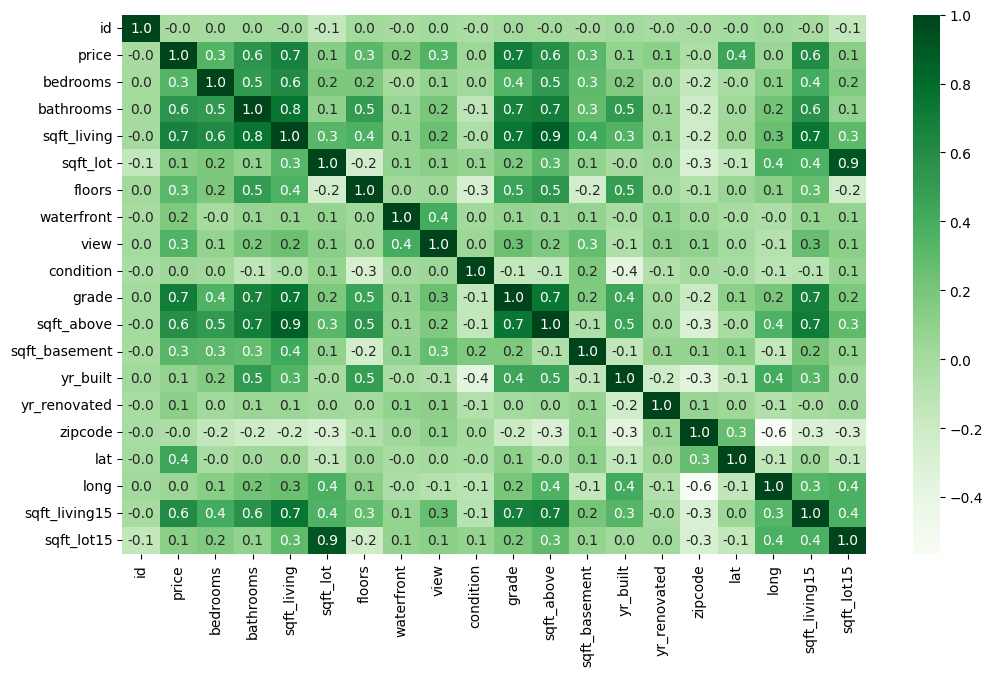

In [ ]:
# correlation matrix
kor = df.corr()
#heatmap
plt.figure(figsize=(12,7))
sns.heatmap(kor,annot=True,cmap='Greens',fmt='.1f')

# Preprocessing

In [ ]:
# drop columns 
df = df.drop(columns=['sqft_living15', 'sqft_lot15'])

In [ ]:
# outlier detection and removal using IQR
# Outlier detection 
from collections import Counter

def detect_outliers(data,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers 

Outliers_to_drop = detect_outliers(df,1,df.select_dtypes(include=np.number))
df.loc[Outliers_to_drop]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
21,2524049179,2014-08-26,14.508658,3,2.75,8.022897,10.711458,1.0,0,4,3,9,7.753624,720,1968,0,98040,47.5316,-122.233
153,7855801670,2015-04-01,14.626441,4,3.25,8.552560,9.895959,2.0,0,3,3,12,8.171882,1640,2006,0,98006,47.5620,-122.162
246,2025069065,2014-09-29,14.690979,4,2.50,8.202482,9.030496,1.0,1,4,3,9,7.512071,1820,2000,0,98074,47.6338,-122.072
269,7960900060,2015-05-04,14.880221,4,3.25,8.527144,9.908475,1.5,0,2,3,11,8.465900,300,1982,2008,98004,47.6312,-122.223
282,7424700045,2015-05-13,14.533350,5,3.00,8.250620,9.045466,2.0,0,1,5,9,7.874739,1200,1905,1994,98122,47.6166,-122.287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,8572900135,2014-05-23,12.897969,3,1.75,7.791523,9.447466,2.0,0,0,3,7,7.791523,0,1911,1986,98045,47.4943,-121.789
7378,7849201100,2015-02-17,12.685408,3,1.00,7.371489,8.956609,2.0,0,0,4,7,7.371489,0,1912,1984,98065,47.5217,-121.819
10169,8570900162,2014-10-16,12.173033,2,1.00,6.856462,9.680094,1.0,0,0,4,7,6.856462,0,1946,1995,98045,47.4987,-121.787
19261,9407100300,2015-04-01,12.676076,3,1.00,7.138867,9.169518,1.0,0,0,3,7,7.138867,0,1970,1995,98045,47.4444,-121.762


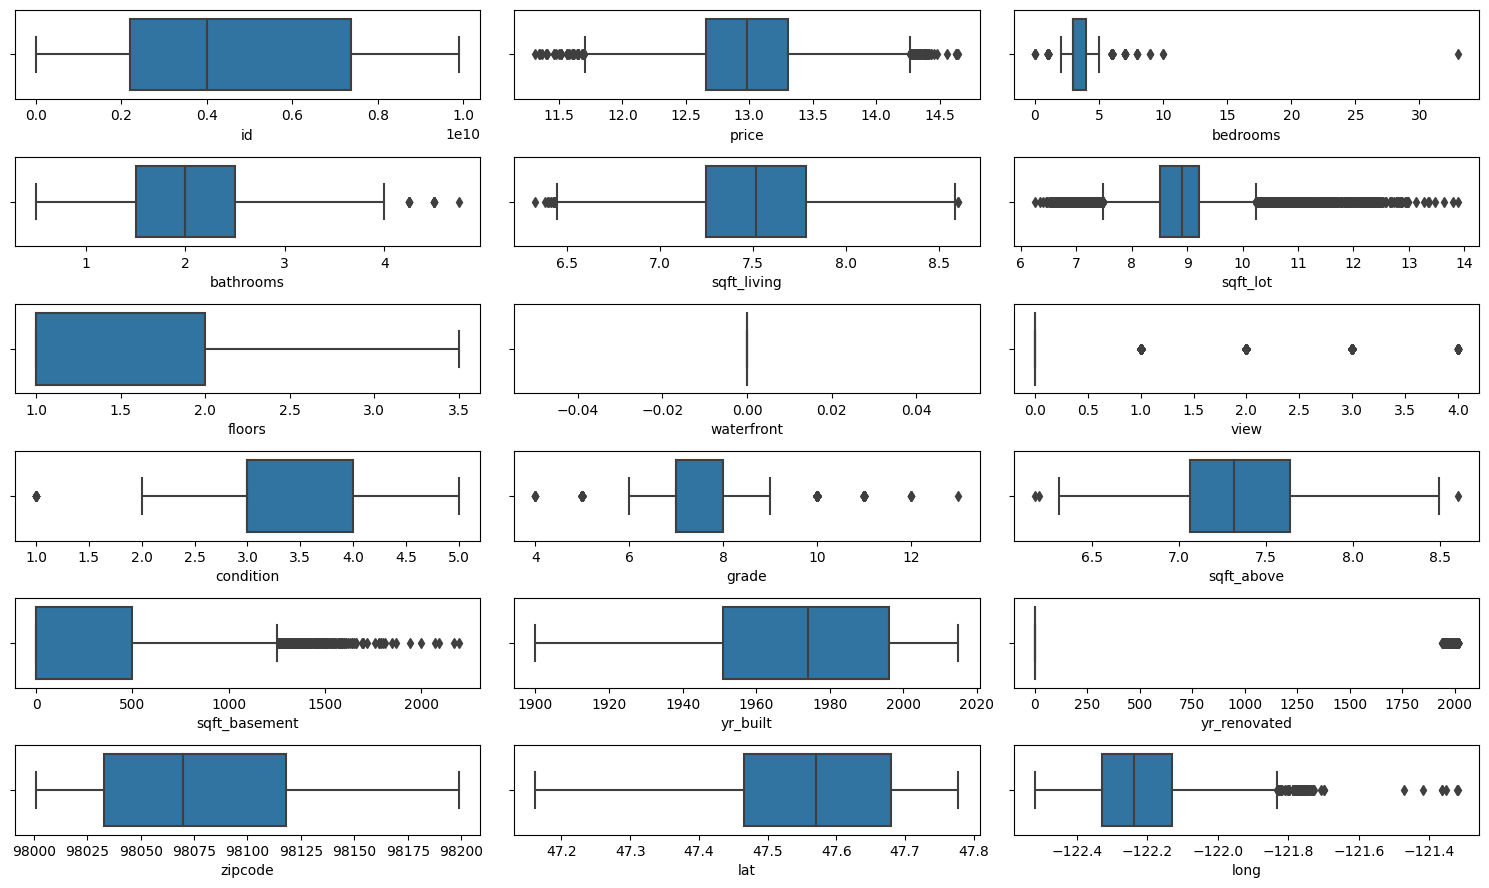

In [ ]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
# Boxplot of data
num_col2 = df.select_dtypes(include=np.number)

# plot size
plt.figure(figsize=(15,10))
for index, column in enumerate(num_col2):
  plt.subplot(7,3,index+1)
  sns.boxplot(data=num_col2,x=column)
plt.tight_layout(pad = 1.0)

In [ ]:
# drop columns
df_train = df.drop(columns=['id','date','zipcode'])
# get features and target
features = df_train.drop(columns=['price'])
target = df_train['price']

In [ ]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(features,target,test_size=.2,random_state=69)

In [ ]:
# Scaling
Sc = StandardScaler()
X_train_scaled = Sc.fit_transform(X_train)
X_test_scaled = Sc.transform(X_test)

# Modeling

In [ ]:
# Linear Regression
linreg = LinearRegression()
# fit/train model
linreg.fit(X_train_scaled, Y_train)
# predict
linreg_pred = linreg.predict(X_test_scaled)

#evaluate regression model
linreg_score = r2_score(Y_test, linreg_pred)
loss = mean_squared_error(Y_test, linreg_pred)
# display result
print(linreg_score)
print(loss)

0.7039747768437724
0.060453192459548395


In [ ]:
# RandomForest Regressor
rf = RandomForestRegressor()
# fit/train model
rf.fit(X_train_scaled, Y_train)
# predict
rf_pred = rf.predict(X_test_scaled)

#evaluate regression model
rf_score = r2_score(Y_test, rf_pred)
rf_loss = mean_squared_error(Y_test, rf_pred)
rf_absolute = mean_absolute_error(Y_test,rf_pred)
# display result
print(rf_score)
print(rf_loss)
print(rf_absolute)

0.8622394622188433
0.02813295507396683
0.11814758425794528


In [ ]:
#Xgboost regressot
#intantiate
xgbreg = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.06)
# fit/train model
xgbreg.fit(X_train_scaled, Y_train)
# predict
xgb_pred = xgbreg.predict(X_test_scaled)

#evaluate regression model
xgb_score = r2_score(Y_test, xgb_pred)
xgb_loss = mean_squared_error(Y_test, xgb_pred)
xgb_absolute = mean_absolute_error(Y_test, xgb_pred)
# display result
print(xgb_score)
print(xgb_loss)
print(xgb_absolute)

0.8780627150328573
0.024901588038743455
0.11054663006500771


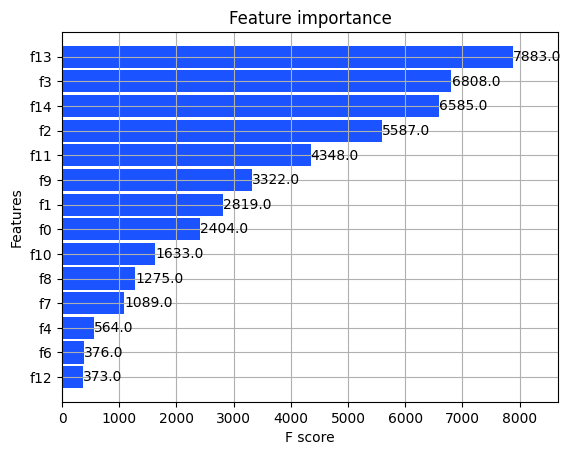

In [ ]:
# plot feature importance
from xgboost import plot_importance
feature_performance = plot_importance(xgbreg, height=0.9,color=river_nights[3])

# Lets Use XGB To Predict Price 😸

In [ ]:
# # Columns for input
input_col = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long']
# while condition
i = 0
while i<=len(input_col):
  if i == 0: 
    bedroom = int(input('Enter Number of bedrooms: '))
  elif i == 1:
    bathrooms = float(input('Enter Number of Bathrooms:'))
  elif i == 2:
    sqft_living_val = int(input('Enter SQFT of living room:'))
  elif i == 3:
    sqft_lot = int(input('Enter Number of sqft_lot:'))
  elif i == 4:
    floors = float(input('Enter Number of floors:'))
  elif i == 5:
    waterfront = int(input('Enter Number of waterfronts:'))
  elif i == 6:
    view = int(input('Enter Number of view:'))
  elif i == 7:
    condition = int(input('Enter Number of room condition:'))
  elif i == 8:
    grade = int(input('Enter Number of grade :'))
  elif i == 9:
    sqft_above = int(input('Enter Number of sqft_above:'))
  elif i == 10:
    sqft_basement = int(input('Enter Number of sqft_basement:'))
  elif i == 11:
    yr_built = int(input('Enter Number of yr_built:'))
  elif i == 12:
    yr_renovated = int(input('Enter Number of yr_renovated:'))
  elif i == 13:
    lat = float(input('Enter Number of lat:'))
  elif i == 14:
    long = float(input('Enter Number of long:'))
  i +=1

Enter Number of bedrooms: 4
Enter Number of Bathrooms:2.5
Enter SQFT of living room:2310
Enter Number of sqft_lot:5813
Enter Number of floors:2.0
Enter Number of waterfronts:0
Enter Number of view:0
Enter Number of room condition:3
Enter Number of grade :8
Enter Number of sqft_above:2310
Enter Number of sqft_basement:0
Enter Number of yr_built:2014
Enter Number of yr_renovated:0
Enter Number of lat:47.5107
Enter Number of long:-122.362


In [ ]:
# transform inputs
T_feat = [sqft_lot,sqft_above,sqft_living_val]
for z in range(len(T_feat)):
  T_feat[z] = np.log(T_feat[z])
T_feat

[8.66785206770135, 7.745002803515839, 7.745002803515839]

In [ ]:
# a list of input data collected along with transformed inputs
input_data = [bedroom, bathrooms,T_feat[0],floors,
              waterfront,view,condition, grade,T_feat[1],sqft_basement,yr_built,
              yr_renovated,lat,long,T_feat[2]]
# scale input data
input_data_scaled = Sc.transform([input_data])

# Saving Model

In [ ]:
import joblib
# name of model
XGB_regressor_house = 'XGBPRED_House_sales.sav'
RF_Regressor_house = 'RF_REGRESSOR_House_sales.sav'

# function
def modelify(model, filename):
  saved_model= joblib.dump(model,filename)
  return saved_model

In [ ]:
scaler_filename = "Sc.sav"
joblib.dump(Sc, scaler_filename)

['Sc.sav']

## Load and Test Model

Original Price Data:
- price                   670000.0
- bedrooms                       3
-bathrooms                    2.5
-sqft_living                 3310
-sqft_lot                    5300
-floors                       2.0
-waterfront                     0
-view                           2
-condition                      3
-grade                          8
-sqft_above                  2440
-sqft_basement                870
-yr_built                    2008
-yr_renovated                   0
-zipcode                    98136
-lat                      47.5178
-long                    -122.389
-sqft_living15               2140
-sqft_lot15                  7500

In [ ]:
# load xgb regressor
modelify(xgbreg, XGB_regressor_house)

['XGBPRED_House_sales.sav']

In [ ]:
# load random forest regressor
modelify(rf, RF_Regressor_house)

['RF_REGRESSOR_House_sales.sav']

In [ ]:
# load_model
loaded_model = joblib.load(XGB_regressor_house)

In [ ]:
# xgb regressor model
Xgb_model_pred= loaded_model.predict(input_data_scaled)
xgb_model_score = np.exp(Xgb_model_pred)
# display score
print('XGBoost Regressor Score:',int(xgb_model_score[0])) # integer price value

XGBoost Regressor Score: 259756


In [ ]:
# load rf_model
loaded_model2 = joblib.load(RF_Regressor_house)
rf_model_pred= loaded_model2.predict(input_data_scaled)
rf_model_score = np.exp(rf_model_pred)
# display score
print('RandomForest Regressor Score:',int(rf_model_score[0])) # integer price value

RandomForest Regressor Score: 381539


The models come somewhat close, as such i will use both its results to whilst providing predictions. RF regressor score, as the least price, and xgboost regressor as the highest price value.